In [1]:
# Load the packages
import pandas as pd
import numpy as np
from datetime import datetime
import tensorflow as tf
import sys
import csv
import math
import keras
import argparse
import scipy.io
import sklearn
import sklearn.datasets
from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(1)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/home/affine/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
Using TensorFlow backend.


In [2]:
from math import sqrt
from numpy import concatenate
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense
from keras.layers import LSTM, GRU, SimpleRNN
from keras.regularizers import L1L2
from keras.layers import Dropout
from keras.optimizers import Adam
from keras.optimizers import SGD

In [3]:
#Load dataset
master_data= pd.read_csv('/home/affine/Downloads/Deep_Learning/demo/demo/TGS/tgs-data-science-master-c3f8b3a2900f40ddde655f8ef5f17d00cfaa7033/data/Master_dataset_v1.csv')

/home/affine/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (7,20,23,25,34,48,65,83) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
#Columns in dataset
master_data.columns

Index(['Unnamed: 0', 'WellId', 'LeaseId', 'GroupId', 'API', 'FieldName_x',
       'Well Name and Number', 'WellNumber_x', 'OperatorName_x', 'StateName_x',
       'County_x', 'ProductionMonthYear', 'DaysOnProduction', 'Gas', 'Oil',
       'Water', 'ProductionType', 'ProductionTypeName', 'WellsReported',
       'AllocationMethod', 'DisplayFormation_x', 'StateLeaseId', 'WellName',
       'WellNumber_y', 'BasinName', 'DisplayFormation_y', 'Township',
       'TownshipDirection', 'Range', 'RangeDirection', 'Section', 'District',
       'Abstract', 'Survey', 'Block', 'Offshore', 'Area', 'OffshoreBlock',
       'QuarterQuarter', 'FootageNS', 'DirectionNS', 'FootageEW',
       'DirectionEW', 'SurfaceLatitude', 'SurfaceLongitude', 'BottomLatitude',
       'BottomLongitude', 'SpudDate', 'PlugDate', 'CompletionDate',
       'FirstProductionDate', 'FirstMonth', 'HasProduction', 'WellType',
       'TotalVerticalDepth', 'MeasuredDepth', 'ElevationGround',
       'ElevationKellyBushing', 'ElevationWat

In [5]:
#selecting Operator 'Occidental W TX OVERTHRUST INC.'
master_data1=master_data[master_data.OperatorName_x=="OCCIDENTAL W TX OVERTHRUST INC."]
#master_data1.head()

In [6]:
#select required API
master_data1=master_data1[master_data1.API==42371381890000]#42371380040000]#42371381890000]#42371381890000]#42371378930000]
labels=['Oil','ProductionMonthYear1','YearMonth']
master_data1=master_data1[labels]

#Sort data based on YearMonth
master_data1=master_data1.sort_values(by=['YearMonth'])#, ascending=[1, 1],axis=1)
#master_data1.tail()

In [7]:
master_data2=master_data1
master_data2=pd.DataFrame(master_data2)
# master_data2['start_date']=datetime.strptime(master_data1['ProductionMonthYear1'].iloc[0], "%Y-%m-%d")
# print(type(pd.DataFrame(master_data2['start_date']).iloc[0,0]))
# print(type(pd.DataFrame(master_data2['ProductionMonthYear1']).iloc[0,0]))

In [8]:
# master_data2['ProductionMonthYear1']=master_data2['ProductionMonthYear1'].map(lambda x: datetime.strptime(x, '%Y-%m-%d'))
# master_data2['days_age']=master_data2['ProductionMonthYear1'].sub(master_data2['start_date'])
# master_data2['days_age']=master_data2['days_age']/np.timedelta64(1,'D')

In [9]:
#Set YearMonth as Index for production
master_data2=master_data2[['YearMonth','Oil']]#,'days_age']]
master_data2=master_data2.iloc[:-2,:]# removing 201708 & 201709 values as they were zeros
master_data2.set_index('YearMonth')

,Oil
YearMonth,
200804,834.0
200805,2701.0
200806,2152.0
200807,2327.0
200808,1712.0
200809,1273.0
200810,1125.0
200811,917.0
200812,817.0


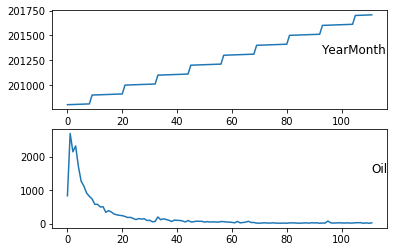

In [10]:
from matplotlib import pyplot
# load dataset
dataset = master_data2
values = dataset.values

# specify columns to plot
groups = [0,1]#,2]#3,4]#,5,6,7,8,9,10]
i = 0
# plot each column
pyplot.figure()
for group in groups:
    pyplot.subplot(len(groups), 1, i+1)
    pyplot.plot(values[:, group])
    pyplot.title(dataset.columns[group], y=0.5, loc='right')
    i += 1
pyplot.show()

In [11]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [116]:
#Define lag(time steps for training) and n_seq(number of time steps to be predicted in future)
n_seq = 12
n_feature=1
n_lag= 18


In [117]:
# load dataset
dataset = master_data2.iloc[:,1:]
values = dataset.values
print(values.shape)
# ensure all data is float
values = values.astype('float32')
#print(values)

# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

# frame as supervised learning
reframed = series_to_supervised(scaled, n_lag, n_seq)

# drop columns we don't want to predict
# reframed.drop(reframed.iloc[:,25:], axis=1, inplace=True)
print(reframed.head())
print(reframed.shape)

(112, 1)
    var1(t-18)  var1(t-17)  var1(t-16)  var1(t-15)  var1(t-14)  var1(t-13)  \
18    0.306206    1.000000    0.795987    0.861018    0.632479    0.469342   
19    1.000000    0.795987    0.861018    0.632479    0.469342    0.414344   
20    0.795987    0.861018    0.632479    0.469342    0.414344    0.337049   
21    0.861018    0.632479    0.469342    0.414344    0.337049    0.299889   
22    0.632479    0.469342    0.414344    0.337049    0.299889    0.271646   

    var1(t-12)  var1(t-11)  var1(t-10)  var1(t-9)     ...      var1(t+2)  \
18    0.414344    0.337049    0.299889   0.271646     ...       0.085098   
19    0.337049    0.299889    0.271646   0.211074     ...       0.076551   
20    0.299889    0.271646    0.211074   0.211446     ...       0.064288   
21    0.271646    0.211074    0.211446   0.181345     ...       0.066518   
22    0.211074    0.211446    0.181345   0.184690     ...       0.053883   

    var1(t+3)  var1(t+4)  var1(t+5)  var1(t+6)  var1(t+7)  var1(t

In [118]:
# split into train and test sets
values = reframed.values
train = values[:-1, :]
test = values[-1:, :]

# split into input and outputs
train_X, train_y = train[:, :-(n_seq)], train[:, -(n_seq):]
test_X, test_y = test[:, :-n_seq], test[:, -n_seq:]

# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], train_X.shape[1], n_feature))
test_X = test_X.reshape((test_X.shape[0], test_X.shape[1], n_feature))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(82, 18, 1) (82, 12) (1, 18, 1) (1, 12)


In [162]:
#Hyperparameters
h1=n_lag*2
h2=n_lag*2
h3=n_seq*2
h4=n_seq
drop1=0.3
drop2=0.2
drop3=0.1 
drop4=0.1
n_y=n_seq
epoch=1000
batch_size=8
lr=0.0009
L1=0.00
L2=0.06

In [163]:
# model.add(LSTM(h1, batch_input_shape=(batch_size,train_X.shape[1],train_X.shape[2]), stateful=True))#,return_sequences=True, recurrent_regularizer=reg))

In [164]:
# design network
model = Sequential()
reg = L1L2(l1=L1, l2=L2)
model.add(LSTM(h1, input_shape=(train_X.shape[1],train_X.shape[2]),return_sequences=True, recurrent_regularizer=reg))
model.add(Dropout(drop1, seed = 1))
model.add(LSTM(h2,return_sequences=True))
model.add(Dropout(drop2, seed = 1))
model.add(LSTM(h3,return_sequences=True))
model.add(Dropout(drop3, seed = 1))
model.add(LSTM(h4,return_sequences=False))
model.add(Dropout(drop4, seed = 1))
model.add(Dense(n_seq, activation='relu'))
model.add(Dense(n_y, activation='relu'))
adam = Adam(lr=lr, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(loss='mae', optimizer= adam)



In [165]:
# model=load_model('LSTM_12_month.h5')
# weights=model.get_weights()
# print(weights)
# model.save_weights('weights.hdf5')
# model.set_weights(weights)
# model.load_weights('weights.hdf5')
# model.load_weights('weights_42371381890000.hdf5')

Train on 82 samples, validate on 1 samples
Epoch 1/1000
 - 7s - loss: 2.0202 - val_loss: 1.7947
Epoch 2/1000
 - 1s - loss: 1.6648 - val_loss: 1.4759
Epoch 3/1000
 - 1s - loss: 1.3711 - val_loss: 1.2148
Epoch 4/1000
 - 1s - loss: 1.1285 - val_loss: 0.9988
Epoch 5/1000
 - 1s - loss: 0.9304 - val_loss: 0.8230
Epoch 6/1000
 - 1s - loss: 0.7686 - val_loss: 0.6796
Epoch 7/1000
 - 1s - loss: 0.6362 - val_loss: 0.5618
Epoch 8/1000
 - 1s - loss: 0.5276 - val_loss: 0.4648
Epoch 9/1000
 - 1s - loss: 0.4378 - val_loss: 0.3851
Epoch 10/1000
 - 1s - loss: 0.3642 - val_loss: 0.3194
Epoch 11/1000
 - 1s - loss: 0.3028 - val_loss: 0.2649
Epoch 12/1000
 - 1s - loss: 0.2521 - val_loss: 0.2197
Epoch 13/1000
 - 1s - loss: 0.2101 - val_loss: 0.1825
Epoch 14/1000
 - 1s - loss: 0.1757 - val_loss: 0.1517
Epoch 15/1000
 - 1s - loss: 0.1476 - val_loss: 0.1264
Epoch 16/1000
 - 1s - loss: 0.1227 - val_loss: 0.1051
Epoch 17/1000
 - 1s - loss: 0.1037 - val_loss: 0.0877
Epoch 18/1000
 - 1s - loss: 0.0867 - val_loss: 0

 - 1s - loss: 0.0068 - val_loss: 0.0023
Epoch 152/1000
 - 1s - loss: 0.0060 - val_loss: 0.0022
Epoch 153/1000
 - 1s - loss: 0.0061 - val_loss: 0.0023
Epoch 154/1000
 - 1s - loss: 0.0060 - val_loss: 0.0027
Epoch 155/1000
 - 1s - loss: 0.0067 - val_loss: 0.0023
Epoch 156/1000
 - 1s - loss: 0.0062 - val_loss: 0.0026
Epoch 157/1000
 - 1s - loss: 0.0069 - val_loss: 0.0023
Epoch 158/1000
 - 1s - loss: 0.0060 - val_loss: 0.0023
Epoch 159/1000
 - 1s - loss: 0.0059 - val_loss: 0.0023
Epoch 160/1000
 - 1s - loss: 0.0058 - val_loss: 0.0025
Epoch 161/1000
 - 1s - loss: 0.0062 - val_loss: 0.0023
Epoch 162/1000
 - 1s - loss: 0.0061 - val_loss: 0.0025
Epoch 163/1000
 - 1s - loss: 0.0063 - val_loss: 0.0023
Epoch 164/1000
 - 1s - loss: 0.0064 - val_loss: 0.0026
Epoch 165/1000
 - 1s - loss: 0.0070 - val_loss: 0.0023
Epoch 166/1000
 - 1s - loss: 0.0057 - val_loss: 0.0022
Epoch 167/1000
 - 1s - loss: 0.0058 - val_loss: 0.0023
Epoch 168/1000
 - 1s - loss: 0.0055 - val_loss: 0.0024
Epoch 169/1000
 - 1s - lo

 - 0s - loss: 0.0055 - val_loss: 0.0024
Epoch 301/1000
 - 0s - loss: 0.0056 - val_loss: 0.0025
Epoch 302/1000
 - 0s - loss: 0.0057 - val_loss: 0.0021
Epoch 303/1000
 - 0s - loss: 0.0055 - val_loss: 0.0023
Epoch 304/1000
 - 0s - loss: 0.0055 - val_loss: 0.0022
Epoch 305/1000
 - 0s - loss: 0.0057 - val_loss: 0.0025
Epoch 306/1000
 - 0s - loss: 0.0060 - val_loss: 0.0023
Epoch 307/1000
 - 0s - loss: 0.0057 - val_loss: 0.0026
Epoch 308/1000
 - 0s - loss: 0.0060 - val_loss: 0.0023
Epoch 309/1000
 - 0s - loss: 0.0062 - val_loss: 0.0030
Epoch 310/1000
 - 0s - loss: 0.0068 - val_loss: 0.0024
Epoch 311/1000
 - 0s - loss: 0.0057 - val_loss: 0.0024
Epoch 312/1000
 - 0s - loss: 0.0063 - val_loss: 0.0023
Epoch 313/1000
 - 0s - loss: 0.0058 - val_loss: 0.0025
Epoch 314/1000
 - 0s - loss: 0.0060 - val_loss: 0.0024
Epoch 315/1000
 - 0s - loss: 0.0057 - val_loss: 0.0026
Epoch 316/1000
 - 0s - loss: 0.0058 - val_loss: 0.0024
Epoch 317/1000
 - 0s - loss: 0.0061 - val_loss: 0.0026
Epoch 318/1000
 - 0s - lo

 - 0s - loss: 0.0057 - val_loss: 0.0024
Epoch 450/1000
 - 0s - loss: 0.0058 - val_loss: 0.0027
Epoch 451/1000
 - 0s - loss: 0.0064 - val_loss: 0.0023
Epoch 452/1000
 - 0s - loss: 0.0056 - val_loss: 0.0025
Epoch 453/1000
 - 0s - loss: 0.0055 - val_loss: 0.0023
Epoch 454/1000
 - 0s - loss: 0.0055 - val_loss: 0.0025
Epoch 455/1000
 - 0s - loss: 0.0055 - val_loss: 0.0022
Epoch 456/1000
 - 0s - loss: 0.0056 - val_loss: 0.0022
Epoch 457/1000
 - 0s - loss: 0.0056 - val_loss: 0.0023
Epoch 458/1000
 - 0s - loss: 0.0056 - val_loss: 0.0025
Epoch 459/1000
 - 0s - loss: 0.0057 - val_loss: 0.0024
Epoch 460/1000
 - 0s - loss: 0.0058 - val_loss: 0.0026
Epoch 461/1000
 - 0s - loss: 0.0062 - val_loss: 0.0022
Epoch 462/1000
 - 1s - loss: 0.0059 - val_loss: 0.0024
Epoch 463/1000
 - 1s - loss: 0.0056 - val_loss: 0.0025
Epoch 464/1000
 - 1s - loss: 0.0057 - val_loss: 0.0024
Epoch 465/1000
 - 1s - loss: 0.0058 - val_loss: 0.0024
Epoch 466/1000
 - 1s - loss: 0.0056 - val_loss: 0.0024
Epoch 467/1000
 - 0s - lo

 - 0s - loss: 0.0055 - val_loss: 0.0026
Epoch 599/1000
 - 0s - loss: 0.0057 - val_loss: 0.0022
Epoch 600/1000
 - 0s - loss: 0.0062 - val_loss: 0.0029
Epoch 601/1000
 - 0s - loss: 0.0060 - val_loss: 0.0024
Epoch 602/1000
 - 0s - loss: 0.0056 - val_loss: 0.0024
Epoch 603/1000
 - 0s - loss: 0.0060 - val_loss: 0.0023
Epoch 604/1000
 - 0s - loss: 0.0056 - val_loss: 0.0025
Epoch 605/1000
 - 0s - loss: 0.0056 - val_loss: 0.0026
Epoch 606/1000
 - 0s - loss: 0.0055 - val_loss: 0.0025
Epoch 607/1000
 - 0s - loss: 0.0059 - val_loss: 0.0023
Epoch 608/1000
 - 0s - loss: 0.0057 - val_loss: 0.0025
Epoch 609/1000
 - 0s - loss: 0.0058 - val_loss: 0.0024
Epoch 610/1000
 - 0s - loss: 0.0058 - val_loss: 0.0027
Epoch 611/1000
 - 0s - loss: 0.0067 - val_loss: 0.0024
Epoch 612/1000
 - 0s - loss: 0.0055 - val_loss: 0.0026
Epoch 613/1000
 - 0s - loss: 0.0057 - val_loss: 0.0023
Epoch 614/1000
 - 0s - loss: 0.0054 - val_loss: 0.0026
Epoch 615/1000
 - 0s - loss: 0.0053 - val_loss: 0.0023
Epoch 616/1000
 - 0s - lo

 - 0s - loss: 0.0054 - val_loss: 0.0024
Epoch 748/1000
 - 0s - loss: 0.0057 - val_loss: 0.0027
Epoch 749/1000
 - 0s - loss: 0.0061 - val_loss: 0.0023
Epoch 750/1000
 - 0s - loss: 0.0055 - val_loss: 0.0024
Epoch 751/1000
 - 0s - loss: 0.0052 - val_loss: 0.0024
Epoch 752/1000
 - 0s - loss: 0.0052 - val_loss: 0.0023
Epoch 753/1000
 - 0s - loss: 0.0052 - val_loss: 0.0024
Epoch 754/1000
 - 0s - loss: 0.0051 - val_loss: 0.0025
Epoch 755/1000
 - 0s - loss: 0.0053 - val_loss: 0.0023
Epoch 756/1000
 - 0s - loss: 0.0054 - val_loss: 0.0024
Epoch 757/1000
 - 0s - loss: 0.0059 - val_loss: 0.0025
Epoch 758/1000
 - 0s - loss: 0.0061 - val_loss: 0.0031
Epoch 759/1000
 - 0s - loss: 0.0067 - val_loss: 0.0025
Epoch 760/1000
 - 0s - loss: 0.0056 - val_loss: 0.0029
Epoch 761/1000
 - 0s - loss: 0.0061 - val_loss: 0.0025
Epoch 762/1000
 - 0s - loss: 0.0055 - val_loss: 0.0027
Epoch 763/1000
 - 0s - loss: 0.0053 - val_loss: 0.0022
Epoch 764/1000
 - 0s - loss: 0.0054 - val_loss: 0.0025
Epoch 765/1000
 - 0s - lo

 - 0s - loss: 0.0052 - val_loss: 0.0023
Epoch 897/1000
 - 0s - loss: 0.0056 - val_loss: 0.0027
Epoch 898/1000
 - 0s - loss: 0.0065 - val_loss: 0.0024
Epoch 899/1000
 - 0s - loss: 0.0053 - val_loss: 0.0024
Epoch 900/1000
 - 0s - loss: 0.0052 - val_loss: 0.0025
Epoch 901/1000
 - 0s - loss: 0.0051 - val_loss: 0.0025
Epoch 902/1000
 - 0s - loss: 0.0055 - val_loss: 0.0022
Epoch 903/1000
 - 0s - loss: 0.0053 - val_loss: 0.0027
Epoch 904/1000
 - 0s - loss: 0.0052 - val_loss: 0.0023
Epoch 905/1000
 - 0s - loss: 0.0051 - val_loss: 0.0025
Epoch 906/1000
 - 0s - loss: 0.0052 - val_loss: 0.0023
Epoch 907/1000
 - 0s - loss: 0.0054 - val_loss: 0.0024
Epoch 908/1000
 - 1s - loss: 0.0054 - val_loss: 0.0025
Epoch 909/1000
 - 1s - loss: 0.0050 - val_loss: 0.0024
Epoch 910/1000
 - 1s - loss: 0.0051 - val_loss: 0.0023
Epoch 911/1000
 - 1s - loss: 0.0054 - val_loss: 0.0022
Epoch 912/1000
 - 1s - loss: 0.0059 - val_loss: 0.0029
Epoch 913/1000
 - 1s - loss: 0.0064 - val_loss: 0.0024
Epoch 914/1000
 - 1s - lo

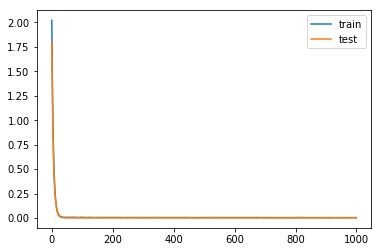

In [166]:
# fit network
history = model.fit(train_X, train_y, epochs = epoch, batch_size = batch_size, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# model.save('LSTM_12_month_42371381890000.h5')
# del model

# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [167]:
#SAVE THE MODEL

model.save('LSTM_12_month_42371381890000_v3.h5')
# model=load_model('LSTM_12_month_42371380040000.h5')
# weights=model.get_weights()
# print(weights)
model.save_weights('weights_42371381890000_v3.hdf5')
# model.set_weights(weights)
# weights=model.load_weights('weights_42371380040000.hdf5')
# model.set_weights(weights)

In [168]:
#Predict the model on test
yhat = model.predict(test_X)
# print(yhat.shape)
# print(test_y.shape)

# invert scaling for forecast
inv_yhat = scaler.inverse_transform(yhat)
# print(inv_yhat.shape)
inv_yhat = inv_yhat[:,:]

# invert scaling for actual
inv_y = scaler.inverse_transform(test_y)
inv_y = inv_y[:,:]

# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

#def mean_absolute_error(y_true, y_pred):
MAE = mean_absolute_error(inv_y, inv_yhat)
print("MAE = "+str(MAE))

Test RMSE: 7.247
MAE = 6.2077


In [169]:
# make a prediction on train
yhat_train = model.predict(train_X)

# invert scaling for train forecast
inv_yhat_train = scaler.inverse_transform(yhat_train)

# invert scaling for actual train
inv_y_train = scaler.inverse_transform(train_y)

# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y_train, inv_yhat_train))
print('Train RMSE: %.3f' % rmse)

#def mean_absolute_error(y_true, y_pred):
MAE_train = mean_absolute_error(inv_y_train, inv_yhat_train)
print("MAE Train = "+str(MAE_train))

Train RMSE: 22.869
MAE Train = 12.9242


In [170]:
# Calculate Mape
# Note LSTM always gives 1 step shifted reponse

#test Mape
Mape_test1=[]
for i in range(n_seq-1):
    mape1=(np.abs(inv_y[:,i]-inv_yhat[:,i+1])/(inv_y[:,i]+1))
    Mape_test1.append(mape1)
#print(Mape_test1)
Mape_test=np.mean(Mape_test1)

#Mape_test=np.mean(np.abs(inv_y[i]-inv_yhat[i+1])/(inv_y[i]+1))
#Mape_train=np.mean(np.abs(inv_y_train[i]-inv_yhat_train[i+1])/(inv_y_train[i]+1))
Mape_train=np.mean(np.abs(inv_y_train-inv_yhat_train)/(inv_y_train+1))

print("MAPE Train = "+str(Mape_train))
print("MAPE Test = "+str(Mape_test))

MAPE Train = 0.265169
MAPE Test = 0.236623


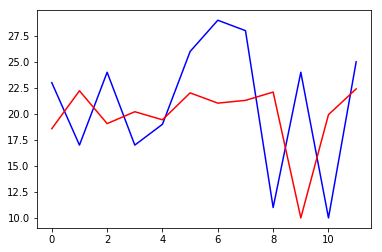

In [171]:
df1=pd.DataFrame(inv_y)
df2=pd.DataFrame(inv_yhat)
value1=df1.values
value2=df2.values
value1=value1.reshape(n_seq,1)
value2=value2.reshape(n_seq,1)
plt.figure()
plt.plot(value1,'b')
plt.plot(value2,'r')
plt.show()

In [172]:
# df1=pd.DataFrame(inv_y_train[0,:])
# df2=pd.DataFrame(inv_yhat_train[0,:])
# print(inv_y_train.shape)
# value1=df1.values
# value2=df2.values
# value1=value1.reshape(n_seq,1)
# value2=value2.reshape(n_seq,1)
# plt.figure()
# plt.plot(value1,'b')
# plt.plot(value2,'r')
# plt.show()

# df1=pd.DataFrame(inv_y_train[20,:])
# df2=pd.DataFrame(inv_yhat_train[20,:])
# print(inv_y_train.shape)
# value1=df1.values
# value2=df2.values
# value1=value1.reshape(n_seq,1)
# value2=value2.reshape(n_seq,1)
# plt.figure()
# plt.plot(value1,'b')
# plt.plot(value2,'r')
# plt.show()

# df1=pd.DataFrame(inv_y_train[40,:])
# df2=pd.DataFrame(inv_yhat_train[40,:])
# print(inv_y_train.shape)
# value1=df1.values
# value2=df2.values
# value1=value1.reshape(n_seq,1)
# value2=value2.reshape(n_seq,1)
# plt.figure()
# plt.plot(value1,'b')
# plt.plot(value2,'r')
# plt.show()

In [174]:
for i in range(len(inv_y)):
    for j in range(len(inv_y[i])):
        print(str(inv_y[i][j])+", "+str(inv_yhat[i][j]))

23.0, 18.5754
17.0, 22.2198
24.0, 19.065
17.0, 20.2077
19.0, 19.4328
26.0, 22.0181
29.0, 21.0319
28.0, 21.2992
11.0, 22.0956
24.0, 10.0
10.0, 19.9263
25.0, 22.4002


In [185]:
# get test results in CSV
df1=pd.DataFrame(inv_y[:,:-1])
df1=pd.DataFrame.transpose(df1)
df2=pd.DataFrame(inv_yhat[:,1:])
df2=pd.DataFrame.transpose(df2)
df3=pd.DataFrame(np.array(master_data2.iloc[-n_seq:-1,:]))
df3.columns=['YearMonth','Oil']
df4=pd.concat([df3,df1,df2],axis=1)
df4.columns=['YearMonth','Oil','Oil_Actual','Oil_Predicted']
print(df4)

    YearMonth   Oil  Oil_Actual  Oil_Predicted
0    201608.0  23.0   23.000000      22.219757
1    201609.0  17.0   17.000000      19.065039
2    201610.0  24.0   23.999998      20.207710
3    201611.0  17.0   17.000000      19.432756
4    201612.0  19.0   19.000000      22.018070
5    201701.0  26.0   26.000000      21.031864
6    201702.0  29.0   28.999998      21.299177
7    201703.0  28.0   28.000000      22.095581
8    201704.0  11.0   11.000000      10.000000
9    201705.0  24.0   23.999998      19.926338
10   201706.0  10.0   10.000000      22.400221


In [186]:
df4.to_csv('/home/affine/Downloads/Deep_Learning/demo/demo/TGS/Models/Outputs/API_42371381890000_prediction_v3.csv')

In [187]:
df1=pd.DataFrame(inv_y_train)
df11=df1.iloc[:,0]

df2=pd.DataFrame(inv_yhat_train)
df12=df2.iloc[:,0]

df3=pd.DataFrame(np.array(master_data2.iloc[18:-n_seq,:]))
print(df3.shape)
df3.columns=['YearMonth','Oil']

df_train=pd.concat([df3,df11,df12], axis=1)
df_train1=pd.DataFrame(np.array(df_train))
df_train1.columns=["Year-Month","Oil","Actual_Oil","Predicted_Oil"]
df_train1

(82, 2)


,Year-Month,Oil,Actual_Oil,Predicted_Oil
0,200910.0,264.0,264.000000,266.694092
1,200911.0,249.0,249.000000,265.638031
2,200912.0,239.0,239.000000,256.251068
3,201001.0,216.0,216.000000,232.073547
4,201002.0,183.0,183.000000,190.982178
5,201003.0,189.0,189.000000,149.609344
6,201004.0,155.0,155.000000,138.245636
7,201005.0,121.0,120.999992,141.391815
8,201006.0,152.0,151.999985,152.773071
9,201007.0,137.0,136.999985,146.237656


In [188]:
df_train1.to_csv('/home/affine/Downloads/Deep_Learning/demo/demo/TGS/Models/Outputs/API_42371381890000_train_prediction_v3.csv')